# 第4章: 形態素解析
>夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．
>
>なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [7]:
!mecab ../data/neko.txt -o ../data/neko.txt.mecab

### 30. 形態素解析結果の読み込み
>形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [8]:
import pandas as pd
from my_functions import divide_conquer_split

df_waganeko = pd.read_table("../data/neko.txt.mecab", sep=r"\t|,", usecols=[0,1,2,7], names=["surface", "pos", "pos1", "base"], engine='python')
list_idx_eos = df_waganeko[df_waganeko["surface"] == "EOS"].index.tolist()
list_sentence = divide_conquer_split(df_waganeko, list_idx_eos)

### 31. 動詞
>動詞の表層形をすべて抽出せよ．

In [9]:
waganeko_verbs = df_waganeko[df_waganeko["pos"] == "動詞"]
waganeko_verbs["surface"]

26        生れ
32        つか
41         し
46        泣い
52         し
          ..
226230    死ん
226235    得る
226241    死な
226244     得
226245    られ
Name: surface, Length: 28901, dtype: object

### 32. 動詞の基本形
> 動詞の基本形をすべて抽出せよ

In [10]:
waganeko_verbs["base"]

26        生れる
32         つく
41         する
46         泣く
52         する
         ... 
226230     死ぬ
226235     得る
226241     死ぬ
226244     得る
226245    られる
Name: base, Length: 28901, dtype: object

### 33. 「AのB」
> 2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [11]:
idx_no = df_waganeko[df_waganeko["surface"] == "の"].index.to_list()
for idx in idx_no:
    if (df_waganeko.iloc[idx-1]["pos"] == "名詞") & (df_waganeko.iloc[idx+1]["pos"] == "名詞"):
        noun1 = df_waganeko.iloc[idx-1]["surface"]
        noun2 = df_waganeko.iloc[idx+1]["surface"]
        print(noun1 + "の" + noun2)

彼の掌
掌の上
書生の顔
はずの顔
顔の真中
穴の中
書生の掌
掌の裏
何の事
肝心の母親
藁の上
笹原の中
池の前
池の上
一樹の蔭
垣根の穴
隣家の三
時の通路
一刻の猶予
家の内
彼の書生
以外の人間
前の書生
おさんの隙
おさんの三
胸の痞
家の主人
主人の方
鼻の下
吾輩の顔
自分の住
吾輩の主人
家のもの
うちのもの
彼の書斎
本の上
皮膚の色
本の上
彼の毎夜
以外のもの
主人の傍
彼の膝
膝の上
経験の上
飯櫃の上
炬燵の上
ここのうち
供の寝床
彼等の中間
供の一
例の神経
性の主人
次の部屋
自分の勝手
吾輩の方
台所の板の間
吾輩の尊敬
向の白
玉のよう
そこの家
家の書生
裏の池
親子の愛
もっともの議論
刺の頭
鰡の臍
彼等のため
軍人の家
代言の主人
教師の家
猫の時節
吾輩の家
家の主人
だらけの英文
胃弱の癖
後架の中
平の宗
月の月給
当分の間
下のよう
今更のよう
主人の述懐
彼の友
金縁の眼鏡
主人の顔
内の想像
訳のもの
利の大家
金縁の裏
吾輩の後ろ
彼の友
吾輩の輪廓
顔のあたり
上乗の出来
顔の造作
他の猫
不器量の吾輩
吾輩の主人
斯産の猫
斑入りの皮膚
主人の彩色
一種の色
身内の筋肉
主人の予定
座敷の中
悪口の言いよう
人の気
彼の背中
こっちの便利
自己の力量
人間の不徳
吾輩の家
家の裏
浩然の気
小春の穏
日の二
茶の木の根
西側の杉
垣のそば
他の庭
純粋の黒
彼の皮膚
皮膚の上
毛の間
中の大王
吾輩の倍
嘆賞の念
好奇の心
彼の前
小春の風
垣の上
梧桐の枝
枚の葉
枯菊の茂み
真丸の眼
人間の珍重
双眸の奥
吾輩の矮小
額の上
声の底
吾輩の心臓
ここの教師
教師の家
良家の猫
車屋の黒
車屋の黒
主義の的
彼の名
軽侮の念
左の問答
車屋の方
うちの主人
車屋の猫
どこの国
己の後
教師の方
車屋の黒
相当の気焔
畠の中
黒の比較
彼の鼻
鼻の先
彼の気焔
自分の手柄
墻壁の欠
彼の答
鼠の百
掃除の時
うちの亭主
石灰の袋
椽の下
たちの野郎
溝の中
去年の臭気
鼻の頭
反対の結果
うちの亭主
己の御蔭
無学の黒
背中の毛
黒の子分
以外の御馳走
教師の家
教師のよう
吾輩の主人
日の日記
今日の会
質の人
人の妻君
連中のうち
吾輩の水彩
屋の酒
一廉の水彩
吾輩の水彩
野暮の方
芸者の妻君


### 34. 名詞の連接
>名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [42]:
import itertools

noun_index = df_waganeko[df_waganeko["pos"] == "名詞"].index.to_list()

group = [list(g) for _, g in itertools.groupby(noun_index, key=lambda n, c=itertools.count(): n - next(c))]

for i in range(len(group)):
    if len(sub_group := group[i]) >= 2:
        consequtive_noun = ""
        for idx_noun in sub_group:
            consequtive_noun = consequtive_noun + df_waganeko["surface"][idx_noun]
        print(consequtive_noun)

人間中
一番獰悪
時妙
一毛
その後猫
一度
ぷうぷうと煙
邸内
三毛
書生以外
四五遍
この間おさん
三馬
御台所
まま奥
住家
終日書斎
勉強家
勉強家
勤勉家
二三ページ
主人以外
限り吾輩
朝主人
一番心持
二人
一つ床
一人
最後大変
神経胃弱性
物指
尻ぺたをひどく
言語同断
家内総がかり
筋向
白君
度毎
白君
先日玉
四疋
三日目
四疋
白君
我等猫族
家族的生活
三毛君
所有権
我々同族間
目刺
一番先
彼等人間
我等
吾人
白君
三毛君
間違いだらけ
後架先生
宗盛
宗盛
月給日
水彩絵具
毎日毎日書斎
人の
自ら筆
眼鏡越
一室内
以太利
大家アンドレア・デル・サルト
露華
寒鴉
これ一幅
活画
翌日吾輩
一分
辛棒
今吾輩
今吾輩
波斯産
上不思議
盲猫
心中ひそか
いくらアンドレア・デル・サルト
一分
あと大
壊わし
馬鹿野郎
馬鹿野郎
辛棒
馬鹿野郎呼わり
平生吾輩
馬鹿野郎
みんな増長
先どこ
数倍
十坪
腹加減
穏かな日
二時頃
昼飯後
運動かたがた
一本一本
杉垣
前後不覚
庭内
忍び入り
黒猫
柔毛
出ずるよう
猫中
杉垣
二三枚
ぐべき力
険呑
時吾輩
言葉付
誰だい
乱暴猫
同盟敬遠主義
一体車屋
大分強そう
おれなんざ
茶畠
箆棒め
あらら
その後吾輩
車屋相当
不徳事件
日例
茶畠
何匹
近付
事彼
手柄話
欠所
三四十
二百
一人
何鼠
こん畜生
泥溝
奴め最後っ屁
二三遍
百年目
考げ
五銭
壱円五十銭
胡魔化
鼠以外
水彩画
十二月一日
大分放蕩
元来放蕩家
放蕩家
水彩画
料理屋
水彩画家
水彩画
通人論
水彩画
批評眼
二日
十二月四日
水彩画
通り下手
水彩画
水彩画家
所謂通人
水彩画
翌日例
金縁眼鏡
美学者
結果今日
美学者
美学者
アンドレア・デル・サルト事件
情線
滑稽的美感
仏国革命史
日本文学会
演説会
傍聴者
百名
皆熱心
文学者
歴史小説セオファーノ
歴史小説
女主人公
鬼気人
僕同様
神経胃弱性
差支
ただ化
美学者
時ゃ別
けらけら
美学者
美学者
模様画
君注意
半分降参
その後跛
眼脂
一杯
最後屁
肴屋
二三段
三間半
南向
木枯
毎日学校
水彩画
功能
一枚
絵端書
年始状
険呑
絵端書
絵端書
吾輩猫属
粗末簡便
一列一体
自家固有
十人十色
人間界
鼻付
張り具合
立ち按排
垂

### 35. 単語の出現頻度
> 文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [ ]:
# 前処理 (ごり押し)
waganeko_words = df_waganeko[(df_waganeko["surface"]!="記号") & (df_waganeko["surface"]!="EOS")]
waganeko_words = waganeko_words[(waganeko_words["pos"]!="記号") & (waganeko_words["pos"]!="フィラー") & (waganeko_words["pos"]!="空白") & (waganeko_words["pos"]!="その他")]

word_frequency = waganeko_words["surface"].value_counts()
word_frequency

surface
の       9193
て       6868
は       6421
に       6242
を       6071
        ... 
悔やん        1
墓場         1
切り落し       1
ぎりご        1
拷問         1
Name: count, Length: 13553, dtype: int64

### 36. 頻度上位10語
> 出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<Axes: >

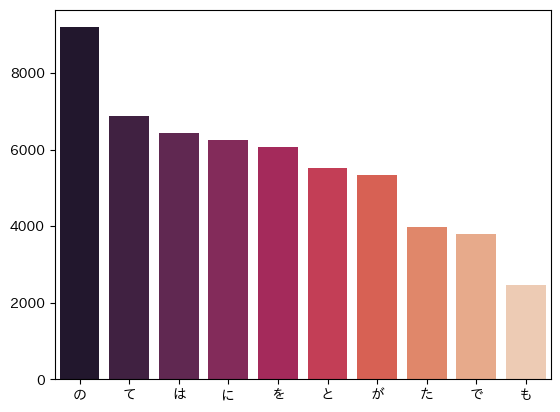

In [ ]:
import japanize_matplotlib
import seaborn as sns

# c.f. https://www.data-green.jp/part_of_speech/
top10 = word_frequency.head(10)
x = top10.index.to_list()
y = top10.values.tolist()
sns.barplot(x=x, y=y, hue=x, palette="rocket")

# *list(zip(*something_tuple))

### 37. 「猫」と共起頻度の高い上位10語
> 「猫」とよく共起する（共起頻度が高い）10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

In [45]:
from my_functions import get_co_occur

df_noun_sentence = df_waganeko[(df_waganeko["surface"] == "EOS") | (df_waganeko["pos"] == "名詞")]
# neko_index = df_noun_sentence[df_noun_sentence["surface"] == "猫"].index.to_list()
list_idx_eos = df_noun_sentence[df_noun_sentence["surface"] == "EOS"].index.tolist()
list_conotation = get_co_occur(df_noun_sentence, "猫", list_idx_eos)

<Axes: ylabel='Count'>

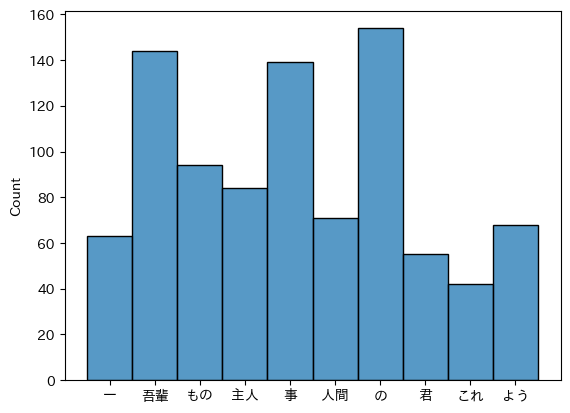

In [ ]:
data = pd.DataFrame(list_conotation)
top10_co_occurs = data.value_counts()[:10].index.to_list() # タプルのリストになっている
top10_co_occurs = [c[0] for c in top10_co_occurs]
data  = data[data[0].isin(top10_co_occurs)][0].to_list() # 上位10件
sns.histplot(data)

### 38. ヒストグラム
> 単語の出現頻度のヒストグラムを描け．ただし，横軸は出現頻度を表し，1から単語の出現頻度の最大値までの線形目盛とする．縦軸はx軸で示される出現頻度となった単語の異なり数（種類数）である．

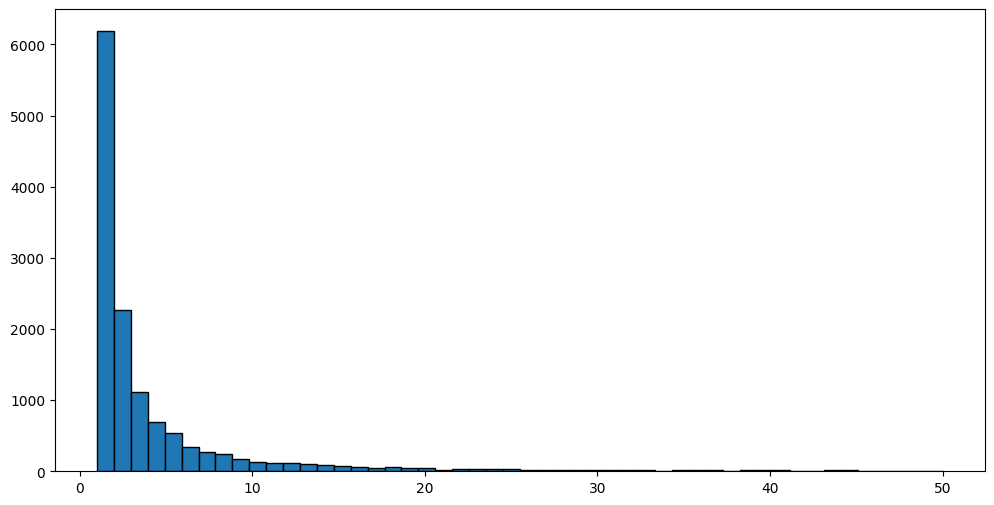

In [49]:
import matplotlib.pyplot as plt
# 前処理 (ごり押し)
waganeko_words = df_waganeko[(df_waganeko["surface"]!="記号") & (df_waganeko["surface"]!="EOS")]
waganeko_words = waganeko_words[(waganeko_words["pos"]!="記号") & (waganeko_words["pos"]!="フィラー") & (waganeko_words["pos"]!="空白") & (waganeko_words["pos"]!="その他")]

word_frequency = waganeko_words["surface"].value_counts(ascending=True).to_list()
word_frequency = pd.DataFrame(word_frequency)

# Create the histogram
plt.figure(figsize=(12, 6))
plt.hist(word_frequency[0], bins=50, edgecolor='black', range=(1,50))
plt.show()

### 39. Zipfの法則
>単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

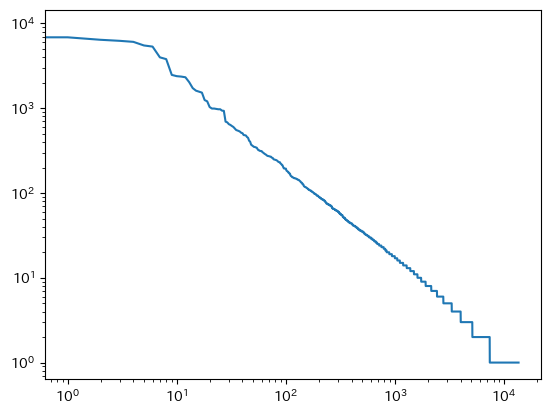

In [ ]:
import numpy as np
ranking = word_frequency[0].sort_values(ascending=False).to_list()

plt.plot(np.arange(len(ranking)), ranking)
plt.xscale("log")
plt.yscale("log")
plt.show()